<a href="https://colab.research.google.com/github/azelia-choi/ITB2022/blob/main/ITB_%E1%84%90%E1%85%A9%E1%86%BC%E1%84%89%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A1_%E1%84%80%E1%85%A1%E1%84%8B%E1%85%B5%E1%86%B8%E1%84%8C%E1%85%A1_%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%86%AF%E1%84%85%E1%85%B2%E1%86%AF_clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 15.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=490afa5ebaf54f60e681eb70c7869615ebb1dc2fe652f05102f36174a90eb518
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 15.8 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.gridspec as gs
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [251]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/Telco_Churn.csv")

In [179]:
sns.set_theme(style="ticks", palette="Set2")

#데이터전처리

###Column 설명

*   customerID : 소비자의 식별자
*   gender : 성별
*   SeniorCitizen : 노인인지의 여부
*   Partner : 배우자의 유무
*   Dependents : 자녀의 유무
*   tenure : 고객의 가입 기간 (개월 수)
*   PhoneService : 휴대폰 서비스를 가입 했는지의 여부
*   MultipleLines : 여러 개의 통신선을 서비스 받고 있는지의 여부 (Yes, No, No phone service) / 휴대폰 서비스를 가입한 고객만 해당됨.
*   InternetService : 인터넷 서비스 제공자 (DSL, Fiber optic, No)
*   OnlineSecurity : 온라인 보안 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   OnlineBackup : 온라인 백업 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   DeviceProtection 기기 보호 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   TechSupport : 기술 서포트 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   StreamingTV : TV 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   StreamingMovies : 영화 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   Contract : 계약 유형 (Month-to-month, One year, Two year)
*   PaperlessBilling : 전자 고지서 여부
*   PaymentMethod : 요금 지불 방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   Contract : 계약 유형 (Month-to-month, One year, Two year)
*   MonthlyCharges : 매달 고객에게 청구되는 금액
*   TotalCharges : 고객에게 청구된 총 금액
*   Churn : 지난 한 달 내에 떠난 고객인지의 여부

In [252]:
df.shape

(7043, 21)

In [253]:
#필요없는 Column 삭제
df =df.reset_index()
df.drop(['customerID'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 




---



In [181]:
# categorical Variables (범주형 변수)
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [9]:
# Numeric Variables (수치형 변수)
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['tenure', 'MonthlyCharges']

In [10]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#Removing missing values 
df.dropna(inplace = True)



---



Column 생성: 파트너와 자녀로 구분해서 나누기

가족단위로: 인구통계학적 원인/서비스

-싱글 (파트너/자녀 무) -커플 -패밀리 -한부모

In [182]:
#Family 칼럼 추가하기
Family = [
    (df['Partner'] == 'Yes') & (df['Dependents'] == 'Yes'),
    (df['Partner'] == 'Yes') & (df['Dependents'] == 'No'),
    (df['Partner'] == 'No') & (df['Dependents'] == 'Yes'),
    (df['Partner'] == 'No') & (df['Dependents'] == 'No')
]

vals = ['Family', 'Couple', 'Single parent', 'Single']
df['Family'] = np.select(Family, vals)

In [183]:
print(df["Family"].value_counts())

Single           3280
Family           1749
Couple           1653
Single parent     361
Name: Family, dtype: int64


ㅤ

ㅤ

#EDA

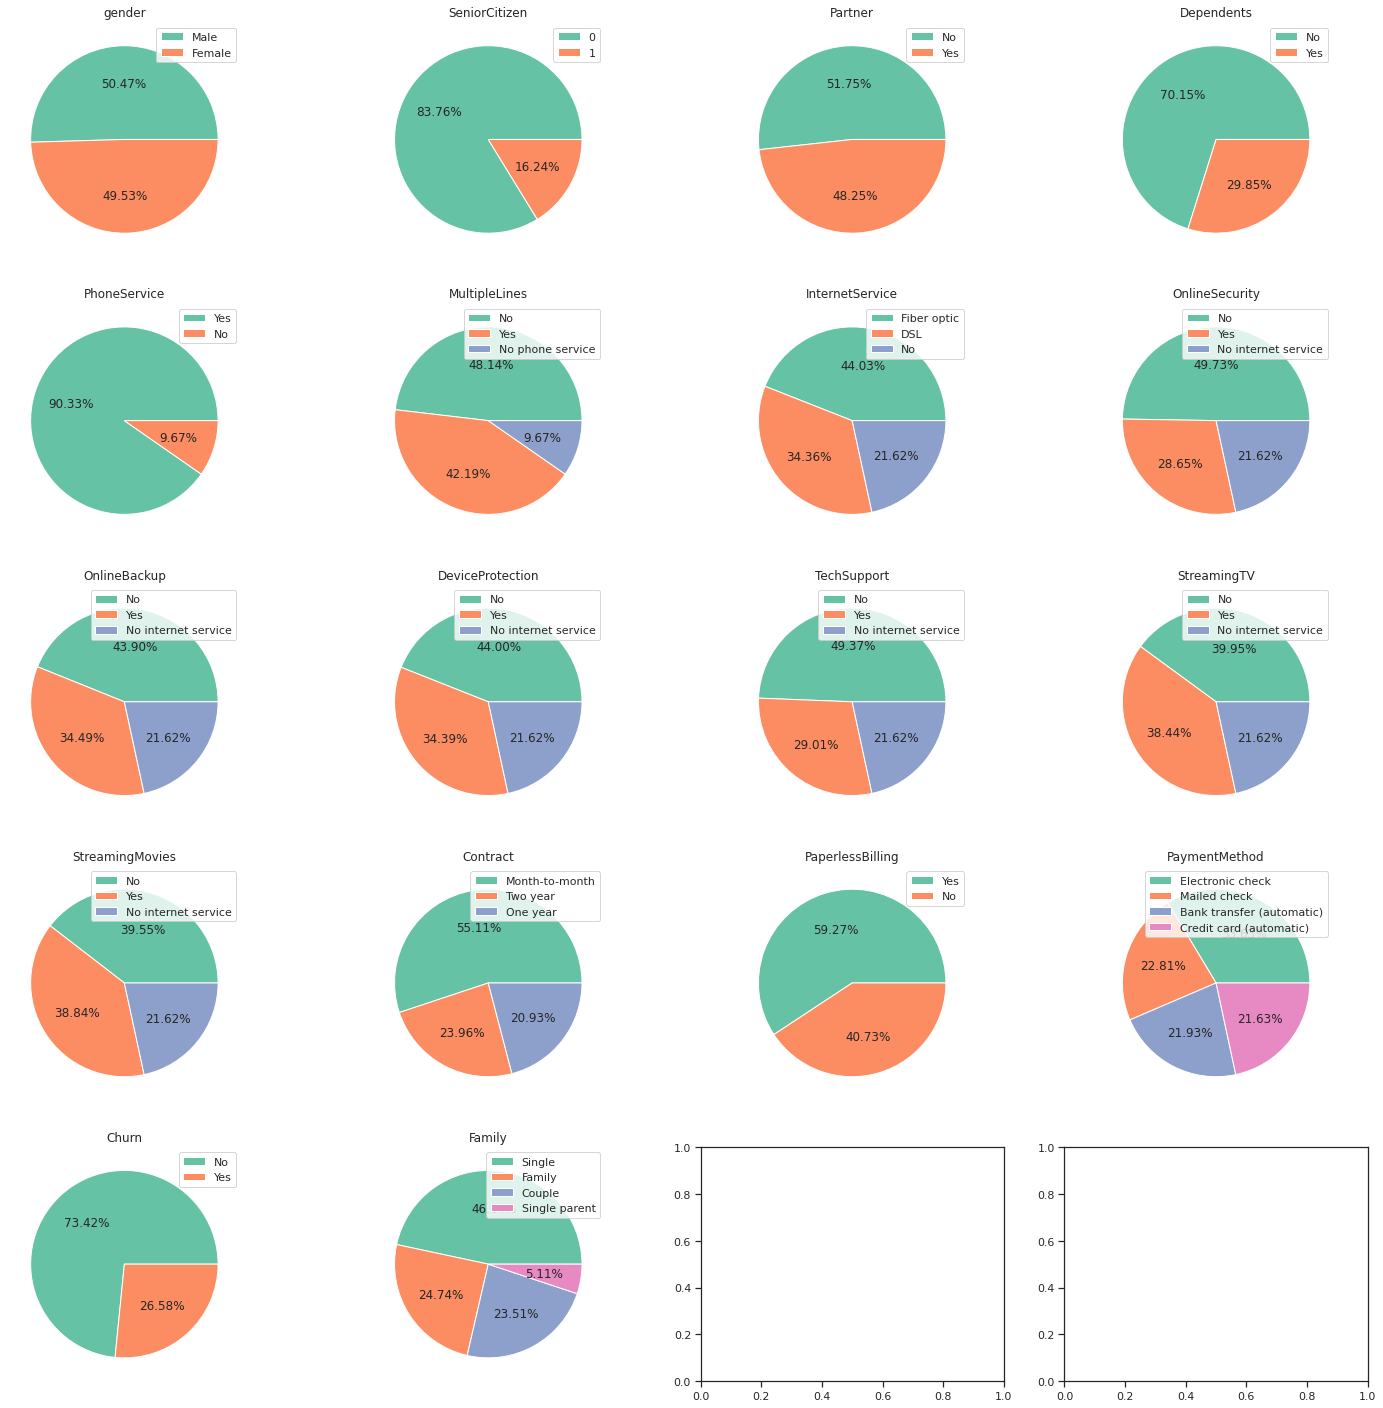

In [14]:
import math

columns = df.columns.tolist()
dellist = ['tenure','MonthlyCharges','TotalCharges']
for i in dellist:
    columns.remove(i)
    
f, axes = plt.subplots(math.ceil(len(columns)/4),4, figsize=(25,25))
for col, ax in zip(columns, axes.ravel()):
        data = df[col].value_counts().values.tolist()
        labels = df[col].value_counts().index.tolist()
        ax.pie(data,autopct='%0.2f%%')
        ax.set_title(col)
        ax.legend(labels,loc='best')



---



In [15]:
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in df.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in df.columns if x != 'Churn']
categorical_columns = list(np.array(df.columns)[columns_idx][string_fields])
categorical_features = [x for x in categorical_columns if x != 'Churn']
continuous_features = [x for x in all_features if x not in categorical_features]

In [16]:
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Family']

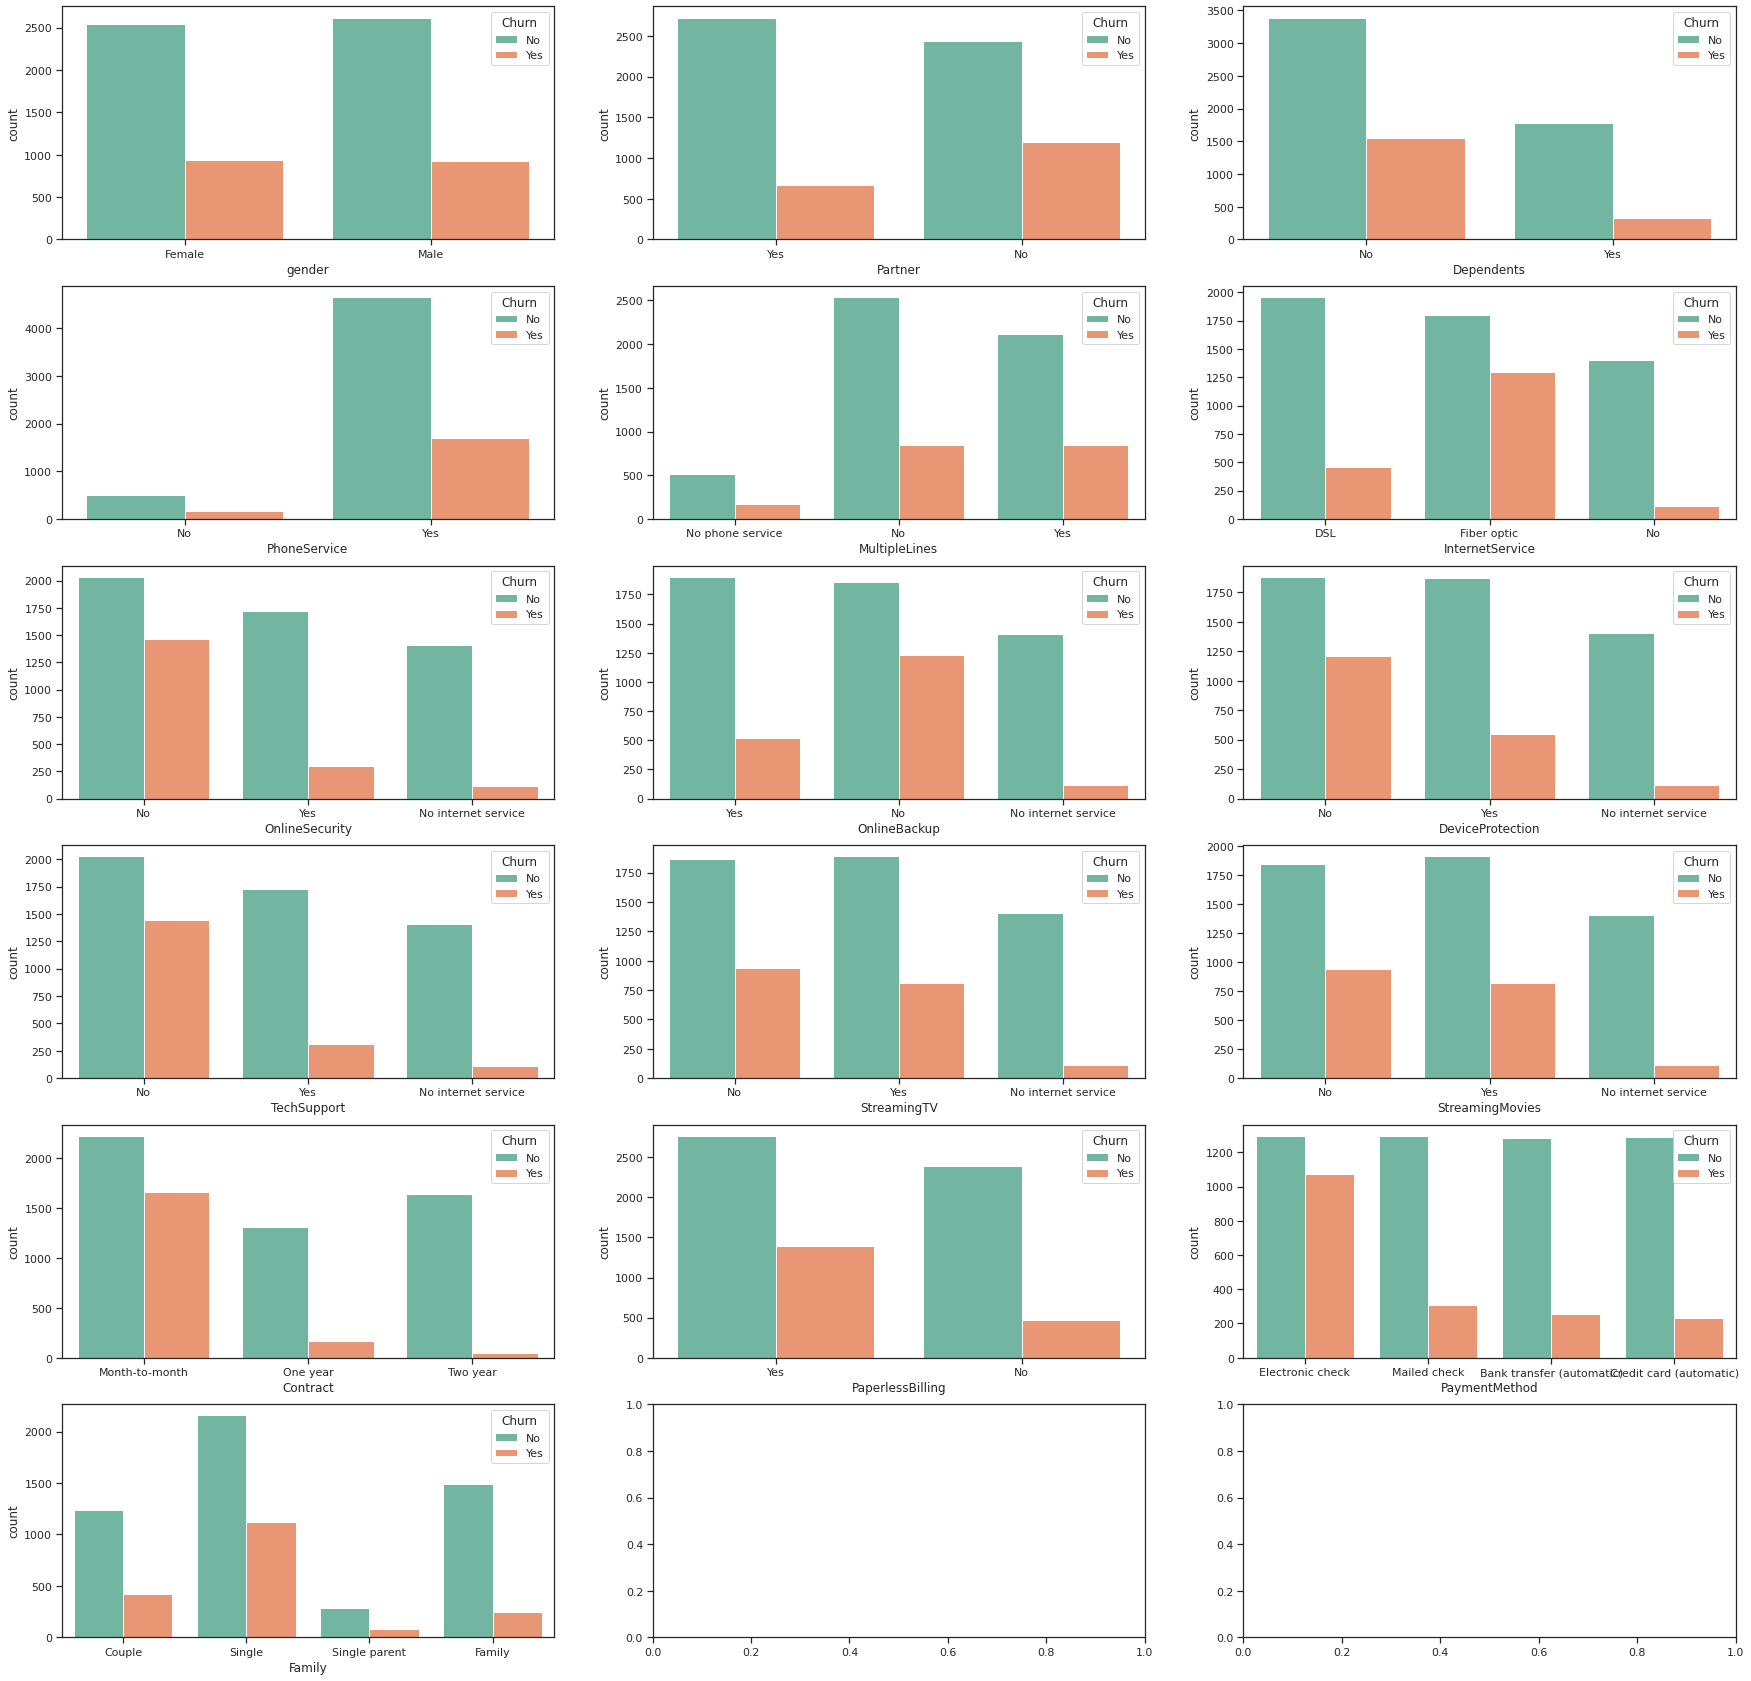

In [17]:
# Categorical feature count plots
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15),(ax16, ax17, ax18)) = plt.subplots(6, 3, figsize=(30, 30))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18 ]

for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], hue="Churn", data=df, ax=ax[i])


1.   **gender**: 성별 간의 이탈률 차이는 없는 것으로 보임
2.   **SeniorCitizen**: 노인의 이탈률이 높음
3.   **Partner/Dependents/Family**:

  Partner가 있는 사람이 Partner가 없는 사람에 비해 이탈률이 낮음 -> Partner가 없을수록 이탈하는 경향이 있다. 
  
  Dependents가 있는 사람이 없는 사람에 비해 이탈률이 낮음 -> Dependents가 없을수록 이탈하는 경향이 있다.
  
  Family(Partner有 / Defendents有)의 이탈률 비중이 제일 적고, Single(Partner無 / Defendents無)의 이탈률이 가장 높다.

    *통신사 결합 상품의 영향/가족결합혜택 때문이라 예상됨


4.   **PhoneService**: 서비스를 사용하는 고객이 사용하지 않는 고객보다 많다.
5.   **MultipleLines**: MultipleLines를 이용하는 사람은 이용하지 않는 사람보다 이탈률이 높다.(통신선을 여러 곳에서 사용하다보니 이탈률이 높은 것으로 예상됨)
6.   **InternetService**:   Fiber optic를 이용하는 고객의 이탈률이 가장 높은 이탈률을 보이는 경향이 있다. internet service를 이용하는 고객일수록 이탈할 가능성이 있다.
7.   **OnlineSecurity**: OnlineSecurity를 이용하지 않는 고객일수록 이탈할 가능성이 높다.
8.   **OnlineBackup**: OnlineBackup 서비스를 이용하지 않는 고객일수록 이탈할 가능성이 높다.
9.   **DeviceProtection**: DeviceProtection 서비스를 이용하지 않는 고객일수록 이탈할 가능성이 높다.
10.   **TechSupport**: TechSupport 서비스를 이용하지 않는 고객일수록 이탈 가능성이 높다.


ㅤ*MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport 서비스는 이용하지 않는 고객일수록 이탈 가능성이 높다.*



11. ** StreamingTV**: StreamingTV를 사용하는 고객과 사용하지 않는 고객의 이탈률 차이가 크지 않다. V 스트리밍 서비스는 이탈률과 무관하다.
12.  **Contract**: 계약 유형 중 월별 주기로 결제하는 서비스의 이탈률이 가장 높다. 계약(결제) 주기가 짧을수록 이탈 가능성이 높고, 계약 주기가 길수록 이탈률이 낮다.
13.  **PaperlessBilling**: 전자고지서를 사용하는 고객이 그렇지 않은 고객보다 이탈 가능성이 높다.
14. **PaymentMethod**: 다른 유형에 비해 Electronic check를 이용하는 고객의 이탈률이 높다.
ㅤ



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f012ae283d0>,
      dtype=object)

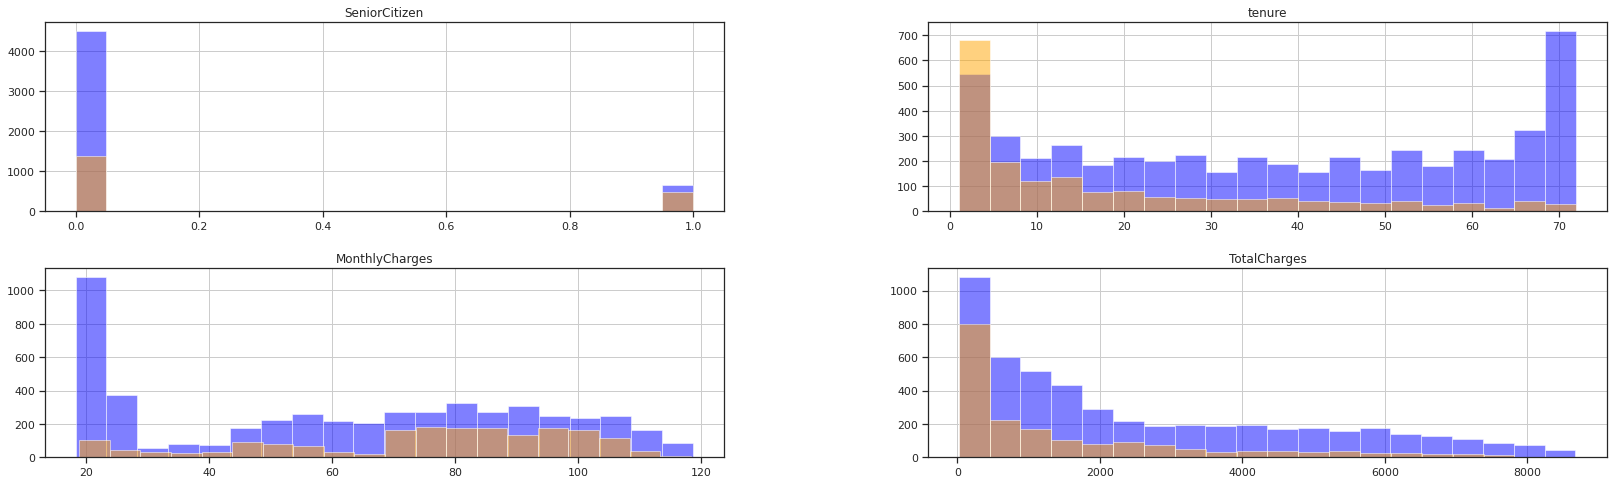

In [18]:
# Continuous feature histograms.
fig, ax = plt.subplots(2, 2, figsize=(28, 8))
df[df.Churn == 'No'][continuous_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][continuous_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

15.  **Tenure**: 가입기간이 적을수록 이탈 확률이 높다.
16. **TotalCharges**: TotalCharges가 높을수록 이탙률이 적다. -> 토탈비용이 높다는 것은 그만큼 오래 통신사를 이용했다는 것으로, 이용 기간이 길수록 이탈률이 적다.



---


###정리

**선택지가 2개인 특성(13개)**: 이탈률이 더 높은 label을 df에 기록함.



고령자일수록, 청구서를 직접 받을수록, 온라인보안서비스를 신청하지 않았을수록 이탈률이 높음.


ㅤ

**선택지가 3개 이상인 특성(3개)**:

cat_plot을 통해 확인


*   Internet Service : fiber optic(광섬유)가 가장 이탈률이 높고 서비스를 신청하지 않은게 가장 이탈률이 낮음
*   Contract : 계약기간이 짧을수록 이탈률이 높음
*   PaymentMethod : 직접 계산할수록 이탈률이 높음


ㅤ



**연속형 특성(3개)**:


*   tenure : 남은기간이 짧을수록 이탈률 높음 
*   MontlyCharges : 이탈률과 선형적 관계없음 
*   TotalCharges : 이탈률과 선형적 관계없음


ㅤ


**상관행렬을 통한 인사이트**

total charges와 montly charges와 tenure 사이에 밀접한 관계가 있음

실제로 확인해본 결과, 식을 발견했음 total charges = montly charges * tenure



---



###가족단위 분석

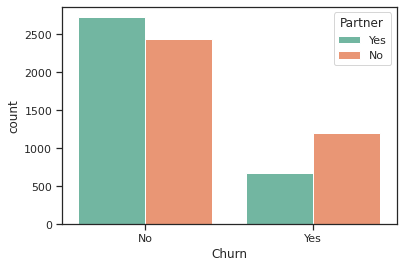

In [19]:
sns.countplot("Churn", data=df,hue="Partner")



배우자가 없는 고객의 이탈율이 배우자가 있는 고객에 비해 약 1.67배 더 높다.

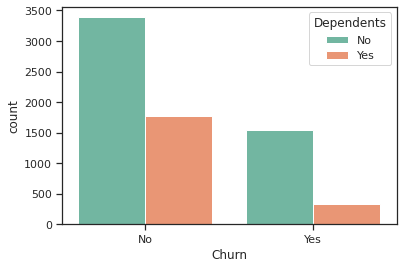

In [20]:
sns.countplot("Churn", data=df,hue="Dependents")



자녀가 없는 고객의 이탈율이 자녀가 있는 고객에 비해 약 2배 더 높다.

In [21]:
print(df["Family"].value_counts())

Single           3280
Family           1740
Couple           1653
Single parent     359
Name: Family, dtype: int64


In [22]:
#이탈 고객 데이터프레임 생성
Churn_Yes = df[df['Churn'] == 'Yes']
#이탈하지 않은 고객 데이터프레임 생성
Churn_No = df[df['Churn'] == 'No']

In [23]:
Churn_Yes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Single
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Single
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Single
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Couple
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Single


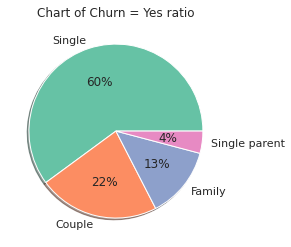

In [24]:
#이탈한 고객의 Family Ratio 파이차트 그리기

labels_Y = Churn_Yes['Family'].value_counts().index.tolist()
ratio_Y = Churn_Yes['Family'].value_counts().values.tolist()

plt.pie(ratio_Y, labels=labels_Y, autopct='%.0f%%', shadow=True)
plt.title('Chart of Churn = Yes ratio')
plt.show()

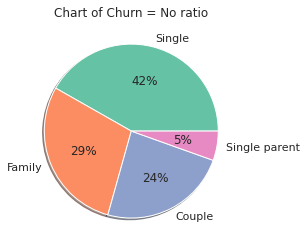

In [25]:
#이탈하지 않은 고객의 Family Ratio 파이차트 그리기
labels_N = Churn_No['Family'].value_counts().index.tolist()
ratio_N = Churn_No['Family'].value_counts().values.tolist()

plt.pie(ratio_N, labels=labels_N, autopct='%.0f%%', shadow=True)
plt.title('Chart of Churn = No ratio')
plt.show()

Text(0.5, 1.0, 'Family feature')

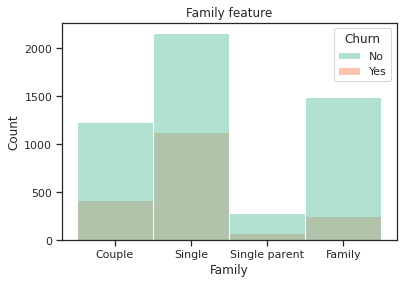

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x="Family",hue='Churn')
plt.title('Family feature')

Single의 이탈률이 약 30%로 가장 높고, Family의 이탈률이 약 15%로 가장 낮다.



---



ㅤ


##상관관계

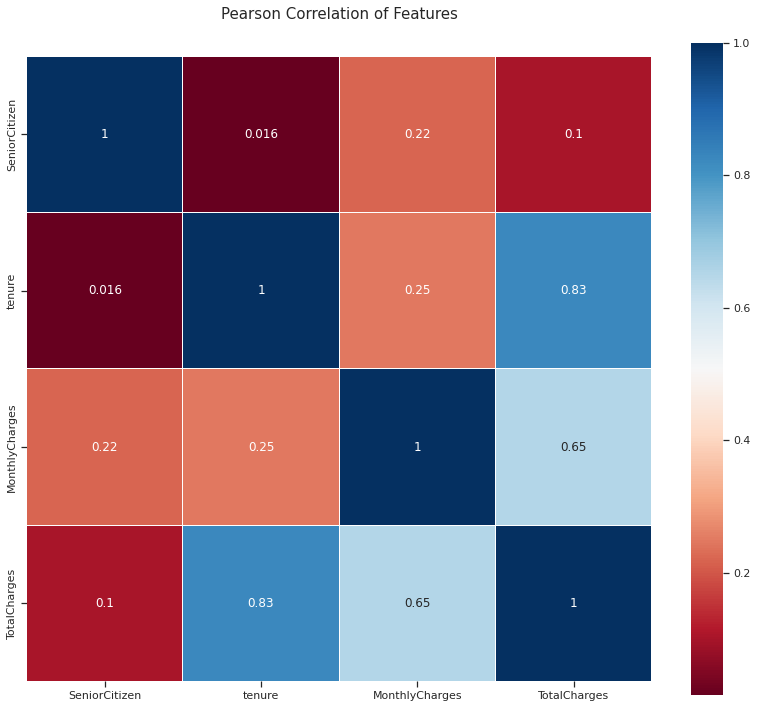

In [27]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1, vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

ㅤ

ㅤ

#Training and Test

In [28]:
X = df[['gender',	'SeniorCitizen',	'Partner',	'Dependents', 'Family',	'tenure',	'PhoneService',	'MultipleLines',	'InternetService',	'OnlineSecurity',	'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]  
y = df[['Churn']]

In [29]:
#의사결정나무 모델을 돌리기 위해 수치형 변수 ('tenure', 'MonthlyCharges', 'TotalCharges')와 문자형 변수를 나눔

#문자형 변수
X_obj = X.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
#수치형 변수
X_int = X[['tenure', 'MonthlyCharges', 'TotalCharges']]
print(X_obj.columns)
print(X_obj.shape)
print(X_int.columns)
print(X_int.shape)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Family',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
(7032, 17)
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
(7032, 3)


In [30]:
#문자형 변수 one-hot encoding
X_dum=pd.get_dummies(X_obj)

In [31]:
X_dum.head()
#one-hot encoding 결과 확인

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Family_Couple,Family_Family,Family_Single,Family_Single parent,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [32]:
X_dum.shape

(7032, 46)

In [33]:
#X_dum과 X_int 합치기
#concat 함수를 사용해서 열방향 (axis = 1) 으로 합치기
X_dum = pd.concat([X_dum,X_int],axis=1,join='inner')
X_dum.shape

(7032, 49)

In [34]:
print(X_dum.isnull().sum())
print(X_dum.shape)

SeniorCitizen                              0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
Family_Couple                              0
Family_Family                              0
Family_Single                              0
Family_Single parent                       0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack



---



In [35]:
X = X_dum

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

###의사결정나무

### X_int 스케일링 전

In [37]:
# 데이터셋을 train과 test 세트로 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.998
시험용 데이터 정확도: 0.726


In [38]:
#나무 깊이를 4로 제한 : 시험용 데이터 정확도: 0.772
#나무 깊이를 5로 제한 : 시험용 데이터 정확도: 0.782
#나무 깊이를 6로 제한 : 시험용 데이터 정확도: 0.774

#나무 깊이를 5로 제한하는 코드 사용!
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.808
시험용 데이터 정확도: 0.782


# 군집화 (new) 

In [184]:
# 데이터 처리를 위한 라이브러리
import numpy as np
import pandas as pd
# 데이터 시각화를 위한 라이브러리
from matplotlib.colors import ListedColormap
import matplotlib as mat
from matplotlib import font_manager
import matplotlib.pyplot as plt    
import seaborn as sns
# 데이터 분석을 위한 라이브러리
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
# 경고메시지 생략을 위한 라이브러리
import warnings
# Rich output을 쉘에서 출력하기 위한 설정
%matplotlib inline

In [185]:
#Importing the Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
np.random.seed(42)

### 데이터스케일링


In [186]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Family'],
      dtype='object')

In [187]:
#Churn과 연관성이 높은 일부 변수만 추출
##TotalCharges, Monthlycharges, tenure, paymentMethod, paperlessbilling, Contract, techsupport, onlinesecurity, internetservice

X_new = df[['TotalCharges', 'MonthlyCharges', 'tenure', 'PaymentMethod', 'PaperlessBilling', 'Contract', 'TechSupport', 'OnlineSecurity', 'InternetService']]
y = df[['Churn']]

In [188]:
#의사결정나무 모델을 돌리기 위해 수치형 변수 ('tenure', 'MonthlyCharges', 'TotalCharges')와 문자형 변수를 나눔

#문자형 변수
X_new_obj = X_new.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
#수치형 변수
X_new_int = X_new[['tenure', 'MonthlyCharges', 'TotalCharges']]
print(X_new_obj.columns)
print(X_new_obj.shape)
print(X_new_int.columns)
print(X_new_int.shape)

Index(['PaymentMethod', 'PaperlessBilling', 'Contract', 'TechSupport',
       'OnlineSecurity', 'InternetService'],
      dtype='object')
(7043, 6)
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
(7043, 3)


In [189]:
#문자형 변수 one-hot encoding
X_new_dum=pd.get_dummies(X_new_obj)

In [190]:
X_new_dum.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_No,PaperlessBilling_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
4,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0


In [191]:
X_new_dum.shape

(7043, 18)

In [192]:
X_new_int.shape

(7043, 3)

In [193]:
print(X_new_dum.shape)
print(X_new_dum.columns)

(7043, 18)
Index(['PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')


In [194]:
#X_dum과 X_int 합치기
#concat 함수를 사용해서 열방향 (axis = 1) 으로 합치기
X_new2_dum = pd.concat([X_new_dum,X_new_int],axis=1,join='inner')
X_new2_dum.shape

(7043, 21)

In [195]:
X_new2_dum.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_No,PaperlessBilling_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,29.85,29.85
1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,34,56.95,1889.5
2,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,2,53.85,108.15
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,45,42.30,1840.75
4,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,2,70.70,151.65


In [199]:
X = X_new2_dum

In [214]:
print(X.info()) 
print(X.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PaymentMethod_Bank transfer (automatic)  7043 non-null   uint8  
 1   PaymentMethod_Credit card (automatic)    7043 non-null   uint8  
 2   PaymentMethod_Electronic check           7043 non-null   uint8  
 3   PaymentMethod_Mailed check               7043 non-null   uint8  
 4   PaperlessBilling_No                      7043 non-null   uint8  
 5   PaperlessBilling_Yes                     7043 non-null   uint8  
 6   Contract_Month-to-month                  7043 non-null   uint8  
 7   Contract_One year                        7043 non-null   uint8  
 8   Contract_Two year                        7043 non-null   uint8  
 9   TechSupport_No                           7043 non-null   uint8  
 10  TechSupport_No internet service          7043 no

In [224]:
X.drop(['TotalCharges'],axis=1, inplace = True)

In [225]:

#데이터 스케일링 :: StandardScaler()을 이용한 표준화
    
    #각 특성의 평균을 0, 분산을 1로 스케일링
    #최솟값과 최댓값의 크기를 제한하지 않음
    #회귀보다 분류에 유용
    #데이터를 정규분포로 만듦
    
scaler = StandardScaler()
scaler.fit(X)
scaled_ds = pd.DataFrame(scaler.transform(X),columns=X.columns)
print("스케일링 완료")

스케일링 완료


In [226]:
scaled_ds.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_No,PaperlessBilling_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,tenure,MonthlyCharges
0,-0.529885,-0.525047,1.406418,-0.544807,-0.829798,0.829798,0.904184,-0.514249,-0.562975,1.013869,-0.525927,-0.639439,1.006696,-0.525927,-0.633933,1.381712,-0.885660,-0.525927,-1.277445,-1.160323
1,-0.529885,-0.525047,-0.711026,1.835513,1.205113,-1.205113,-1.105970,1.944582,-0.562975,1.013869,-0.525927,-0.639439,-0.993349,-0.525927,1.577454,1.381712,-0.885660,-0.525927,0.066327,-0.259629
2,-0.529885,-0.525047,-0.711026,1.835513,-0.829798,0.829798,0.904184,-0.514249,-0.562975,1.013869,-0.525927,-0.639439,-0.993349,-0.525927,1.577454,1.381712,-0.885660,-0.525927,-1.236724,-0.362660
3,1.887201,-0.525047,-0.711026,-0.544807,1.205113,-1.205113,-1.105970,1.944582,-0.562975,-0.986321,-0.525927,1.563872,-0.993349,-0.525927,1.577454,1.381712,-0.885660,-0.525927,0.514251,-0.746535
4,-0.529885,-0.525047,1.406418,-0.544807,-0.829798,0.829798,0.904184,-0.514249,-0.562975,1.013869,-0.525927,-0.639439,1.006696,-0.525927,-0.633933,-0.723740,1.129102,-0.525927,-1.236724,0.197365


In [227]:
scaled_ds.columns

Index(['PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'tenure',
       'MonthlyCharges'],
      dtype='object')

In [228]:
#tsne
# 2차원 t-SNE 임베딩

tsne_np = TSNE(n_components = 2).fit_transform(scaled_ds)
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

In [229]:
tsne_df.describe().T

,count,mean,std,min,25%,50%,75%,max
component 0,7043.0,-0.198876,42.319042,-93.245956,-30.712364,1.355497,33.177174,87.929756
component 1,7043.0,0.157323,43.666843,-102.623108,-29.949376,-0.217070,30.036942,95.248680


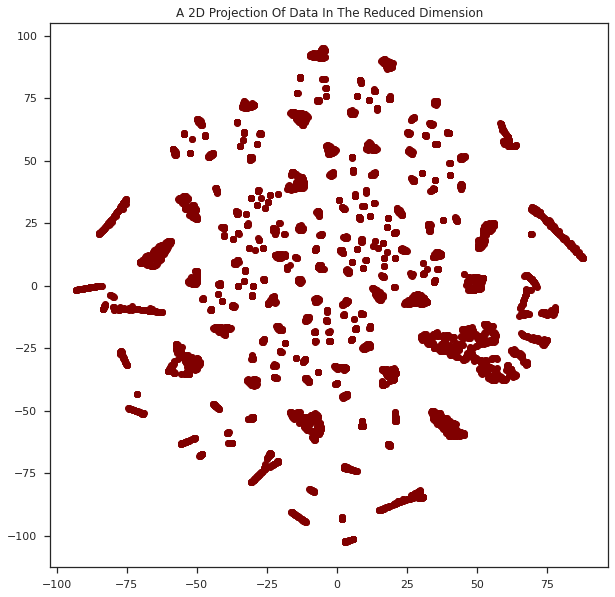

In [230]:
#A 2D Projection Of Data In The Reduced Dimension
x =tsne_df["component 0"]
y =tsne_df["component 1"]

#To plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()

### Clustering

Elbow Method: 몇개의 클러스터를 만들어야 할까?


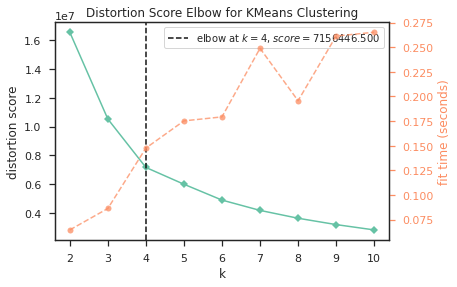

In [231]:
#클러스터링

# 엘보우 기법 (Elbow Method)을 사용하여 몇개의 클러스터를 만들지 확인
print('Elbow Method: 몇개의 클러스터를 만들어야 할까?')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(tsne_df)
Elbow_M.show()

#4개의 클러스터를 만들면 됨

In [232]:
#4개로 클러스터링 모델 시작
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(tsne_df)
tsne_df["Clusters"] = yhat_AC

yhat_AC = pd.DataFrame(yhat_AC)
df = pd.concat([df,yhat_AC],axis=1,join='inner')

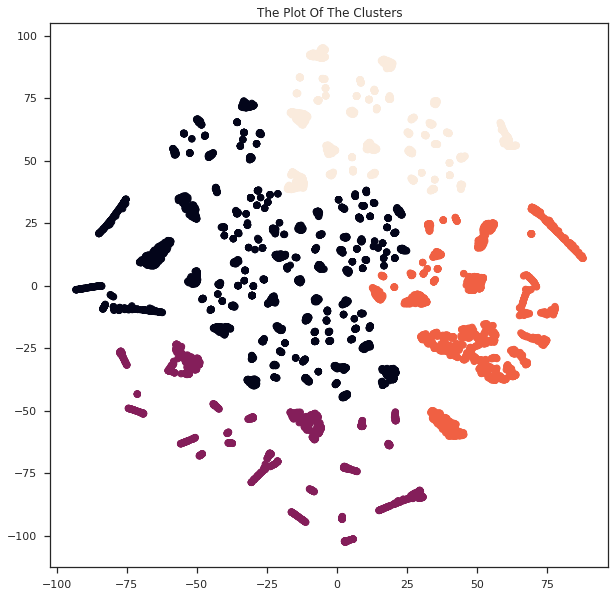

In [233]:
#클러스터가 어떻게 구성됐는지 확인을 위해 3D plot으로 확인
#Plotting the clusters
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y,s=40, c=tsne_df["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

### 군집별 특징 확인

In [234]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family,0
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Couple,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Single,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Single,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Single,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Single,2


In [235]:
df.shape

(7043, 22)

In [236]:
df.rename(columns={0:'Clusters'}, inplace = True)

In [237]:
ds = df

In [238]:
ds.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Family', 'Clusters'],
      dtype='object')

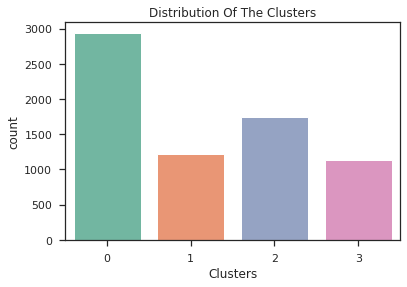

<Figure size 1440x720 with 0 Axes>

In [239]:
# 그룹 별로 몇명 씩 분포되어있는지 확인
pl = sns.countplot(x=ds["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.figure(figsize = (20,10))
plt.show()

#1번 그룹에 해당되는 고객의 수가 가장 많고 2번 그룹에 해당되는 고객의 수가 가장 적음

In [240]:
ds_0 = ds[ds["Clusters"] == 0]

print(ds_0.shape)

ds_1 = ds[ds["Clusters"] == 1]

print(ds_1.shape)

ds_2 = ds[ds["Clusters"] == 2]

print(ds_2.shape)

ds_3 = ds[ds["Clusters"] == 3]

print(ds_3.shape)

(2941, 22)
(1221, 22)
(1751, 22)
(1130, 22)


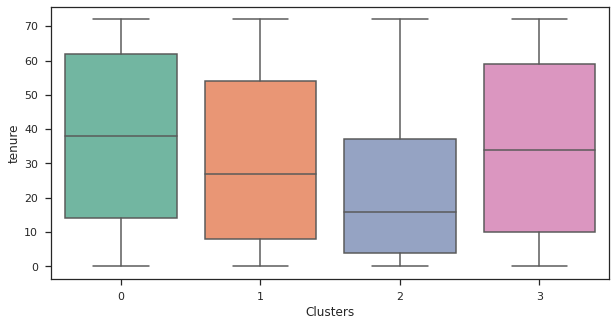

In [241]:
plt.figure(figsize = (10,5))
sns.boxplot(x="Clusters", y="tenure",data = ds)
plt.show() 

#0>3>1>2 순으로 가입기간이 길다

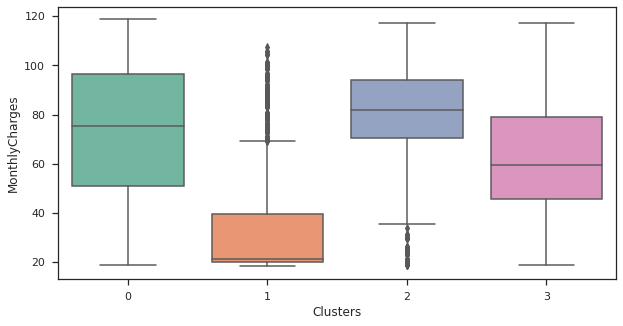

In [242]:
plt.figure(figsize = (10,5))
sns.boxplot(x="Clusters", y="MonthlyCharges",data = ds)
plt.show() 

#2>0>3>1 순으로 월마다 내는 금액이 많다.
#그룹1은 월마다 내는 금액이 확연히 적은 편이다

In [244]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Family', 'Clusters'],
      dtype='object')

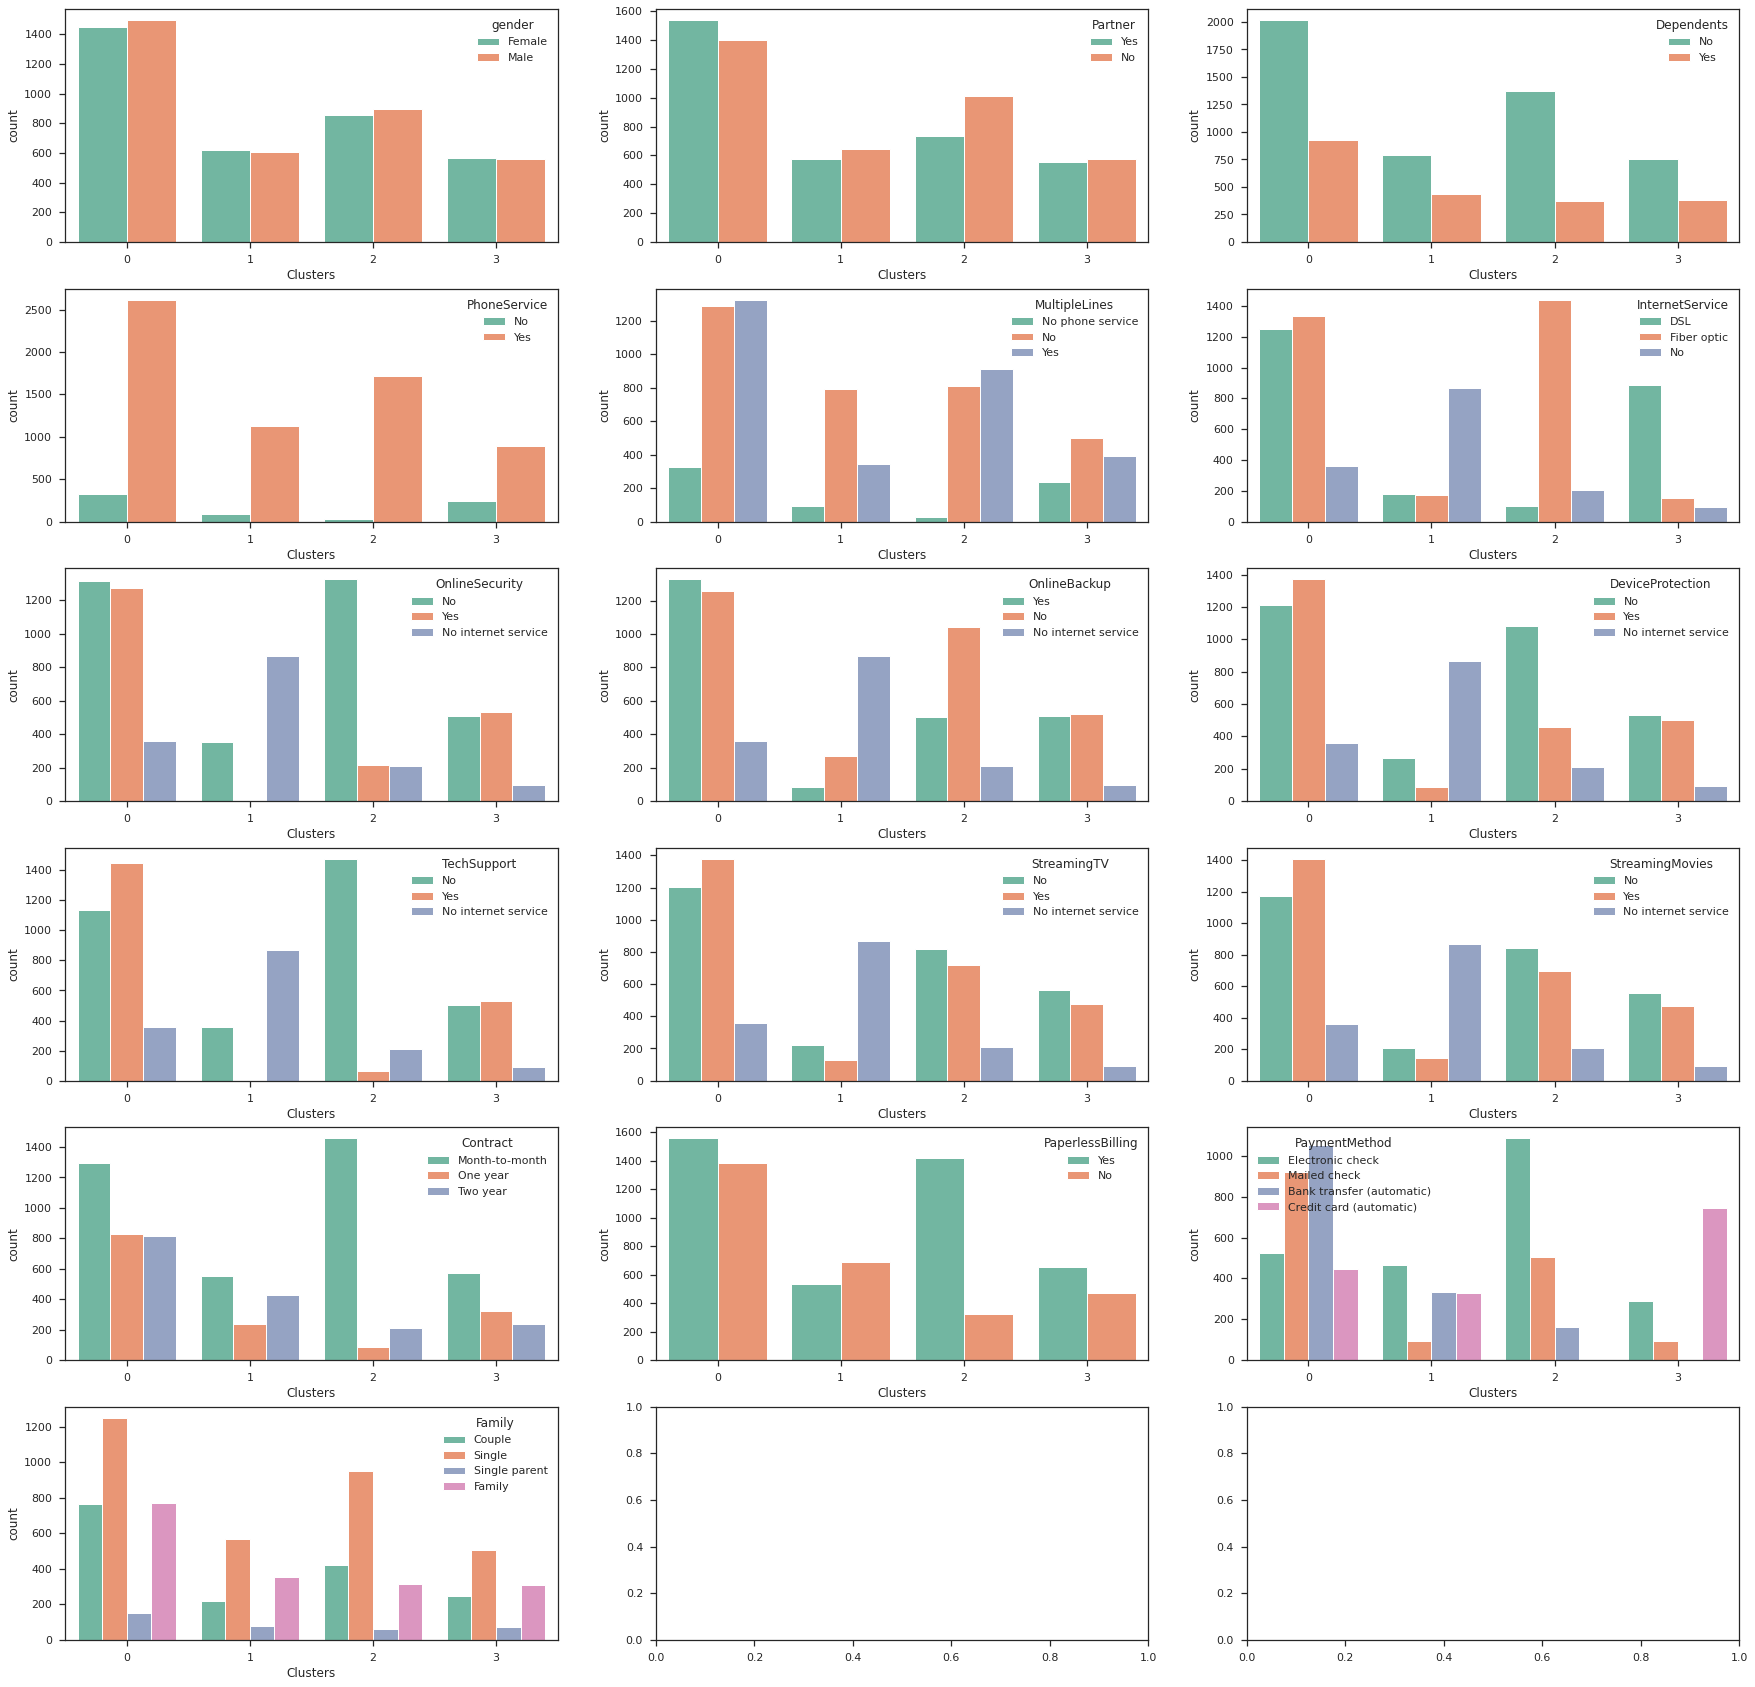

In [245]:
# Categorical feature count plots
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15),(ax16, ax17, ax18)) = plt.subplots(6, 3, figsize=(30, 30))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18 ]

for i in range(len(categorical_features)):
    sns.countplot(hue = categorical_features[i], x="Clusters", data=ds, ax=ax[i])

In [246]:
ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family,Clusters
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Couple,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Single,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Single,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Single,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Single,2
